<h1>Аналіз та обробка БМД</h1>
<h2>БС-82</h2>
<h3 style="font-family:sans-serif;">Микита Любшин<h3>
  <link rel ="stylesheet" href="style.css"></link>
    <h4>Робота 6</h4>


<h1>Дані</h1>

Дані представляють собою кількість разів, після яких гравець у DnD викидує дві 20 на двадцятигранному кубі підряд.
Кожен успішний раз число спроб записується.

Т.я. під час карантину грати в Dungeons and Dragons з іншими людьми є мойже неможливим, два гравці використовують онлайн-ботів для симуляції кидка кубика.

Групи представляють собою число спроб які виконує перший та другий гравець відповідно.

Гравці є близнюками та не можуть змінювати результату кидка кубика.

Єдина відмінність між гравцями в тому, що перший використовує бота, що працює з python бібліотекою random, а інший - бота, що працює на numpy.random.

In [98]:
import pandas as pd
from time import time
from random import randint
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [110]:

def dec(func):
    
    def f(*args, **kwargs):
        before = time()
        ans = func(*args)
        after = time()
        print(f"Elapsed {after - before}s")
        return ans
    return f
    
def r():
    return randint(1,20)
def nt():
    return np.random.randint(1,21)

@dec
def get_n(n, func):
    arr = np.array([])
    for i in range(n):
        k = 0
        while( func() + func() != 40 ):
            k += 1
        arr = np.append(arr, k)
    return arr


N = 10**4

one = get_n(N, r)
two = get_n(N, nt)

Elapsed 6.80274510383606s
Elapsed 68.5099401473999s


In [113]:


results = pd.DataFrame ( 
    [np.mean(one), np.mean(two)],
    columns = ["Статистична розбіжність"],
    index = ['Random', 'Numpy']
)

results.index.name = 'Різниця рандомів'

results

,Статистична розбіжність
Різниця рандомів,
Random,390.7297
Numpy,394.9806


In [114]:
data = pd.DataFrame(
{
    "Група-1.Random.randint": one[3000:3500],
    "Група-2.Numpy.random.randint": two[3000:3500]
    
})
data.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Група-1.Random.randint,982.0,320.0,22.0,171.0,125.0,193.0,60.0,787.0,195.0,108.0,...,168.0,701.0,384.0,1241.0,231.0,563.0,1008.0,1086.0,664.0,882.0
Група-2.Numpy.random.randint,333.0,370.0,213.0,365.0,586.0,197.0,262.0,108.0,81.0,185.0,...,843.0,65.0,354.0,278.0,321.0,533.0,136.0,46.0,297.0,67.0


<p>
2. Побудувати графік, що відображає розкид даних в групах.</p>

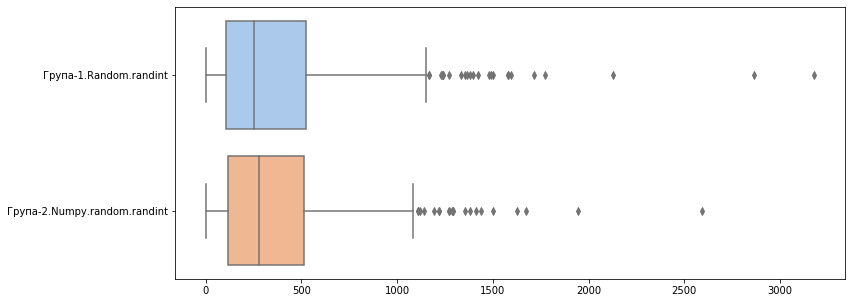

In [115]:
fig, ax = plt.subplots(figsize=(12,5))
fig =  sns.boxplot(orient = "h",data = data, palette="pastel")


<p>
3.Для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).</p>

In [116]:
def cor_pearson(data):
    r_t = len(data)*(sum(data.iloc[:,0]*data.iloc[:,1])) - sum(data.iloc[:,0])*sum(data.iloc[:,1])
    r_b = (len(data)*sum(data.iloc[:,0]**2) - sum(data.iloc[:,0])**2)*(len(data)*sum(data.iloc[:,1]**2) - sum(data.iloc[:,1])**2)
    r = r_t/np.sqrt(r_b)
    
    correlation_table = pd.read_excel("static/correlation-table.xlsx",encoding = 'utf-8')
    
    df = len(data)-2
    i, table_val = 0, 0
    if(df < 130):
        while(i < len(correlation_table) and table_val == 0):
            if(df < int(correlation_table.iloc[i,0])):
                if(df != correlation_table.iloc[i-1,0]):
                    table_val = (correlation_table.iloc[i-1,1] if((correlation_table.iloc[i,0]-df) >= abs(correlation_table.iloc[i-1,0]-df)) else correlation_table.iloc[i,1])
                else:
                    table_val = correlation_table.iloc[i-1,1]
            i += 1
    else:
        table_val = correlation_table.iloc[36,1]
    significant = "significant" if(abs(r) > table_val) else "not significant"
    return r,df,significant
def print_result_pearson_student(set_pir):
    print(f"\n\tЗначення коефіцієнту кореляції - {set_pir[0]}\n\tЗначення ступеня свободи - {set_pir[1]}\n\tРезультат оцінки значимості зв'зку - {set_pir[2]}")

In [117]:
result_pearson = cor_pearson(data)
print_result_pearson_student(result_pearson)


	Значення коефіцієнту кореляції - -0.024082466505862713
	Значення ступеня свободи - 498
	Результат оцінки значимості зв'зку - not significant



4.Для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [126]:
def student(data):
    data["Difference"] = data.iloc[:,0]-data.iloc[:,1]
    M = np.mean(data.iloc[:,2])
    st = np.std(data.iloc[:,2])
    t = (M/st) * np.sqrt(len(data))
    df = len(data)-1
    
    table_values = pd.read_excel("static/student_coef_table.xlsx",encoding = 'utf-8')
    
    table_val, i = 0, 0
    while(i < len(table_values) and table_val == 0):
        if(df < int(table_values.iloc[i,0])):
            if(df != table_values.iloc[i-1,0]):
                table_val = (table_values.iloc[i-1,1] if((table_values.iloc[i,0]-df) >= abs(table_values.iloc[i-1,0]-df)) else table_values.iloc[i,1])
            else:
                table_val = table_values.iloc[i-1,1]
        i += 1
                
    significant = "significant" if(t < table_val) else "not significant"
    return t,df,significant
    
    
student_data = student(data)
print_result_pearson_student(student_data)


	Значення коефіцієнту кореляції - 0.15273110716601246
	Значення ступеня свободи - 499
	Результат оцінки значимості зв'зку - not significant


<p>5.Перевірити розбіжність на між групами на даних з п. 1.</p>

In [127]:
table = pd.DataFrame({
    "Критерій Пірсона":result_pearson,
    "Критерій Стьюдента":student_data
}, index = ["Значення", "Cтупінь свободи", "Значимість зв'язку"])
table

,Критерій Пірсона,Критерій Стьюдента
Значення,-0.0240825,0.152731
Cтупінь свободи,498,499
Значимість зв'язку,not significant,not significant


6. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.

In [128]:
print("Корреляціонний зв'язок між ними статистично значимий" if table.iloc[2,0] == "significant" else "Корреляціонний зв'язок між ними відсутній")
print("Парні групи рівні" if table.iloc[2,1] == "significant" else "Парні групи відмінні")


Корреляціонний зв'язок між ними відсутній
Парні групи відмінні
